In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

C:\Users\edutrade\AppData\Local\Temp\ipykernel_13648\3666952754.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ce['job_posted_month'] = df['job_posted_date'].dt.to_period('M')


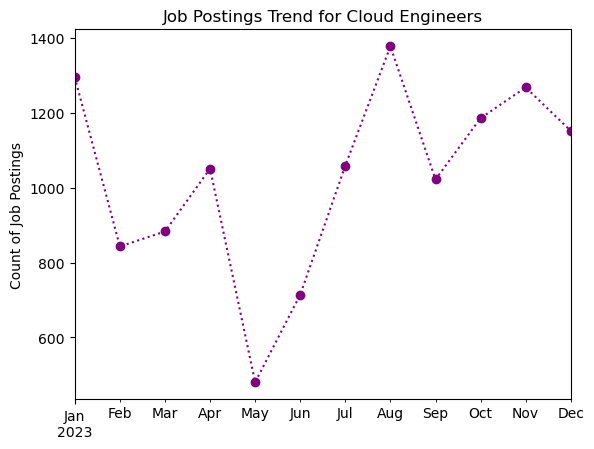

In [8]:
df1 = df.copy()
df_ce = df1[df1['job_title_short'] == 'Cloud Engineer']
df_ce['job_posted_month'] = df['job_posted_date'].dt.to_period('M')
CE_count = df_ce['job_posted_month'].value_counts().sort_index()
CE_count.plot(
    kind='line',
    linestyle=':',
    color='purple',
    marker='o'
    )
plt.title('Job Postings Trend for Cloud Engineers')
plt.ylabel('Count of Job Postings')
plt.xlabel('')
plt.show()

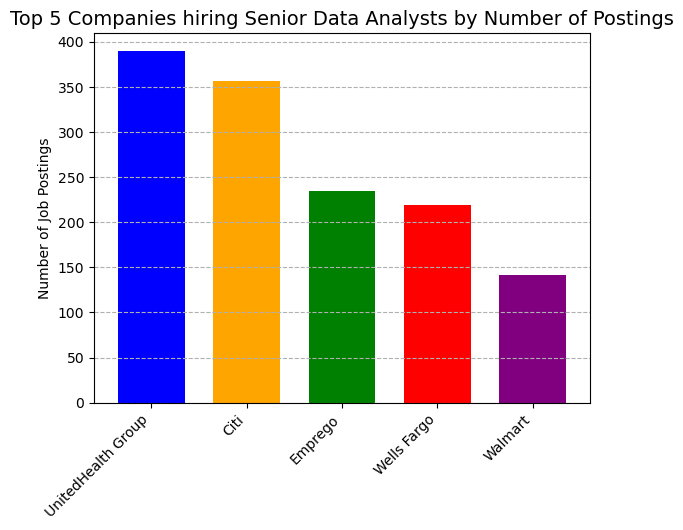

In [26]:
SDA_df = df[df['job_title_short'] == 'Senior Data Analyst'].copy()
SDA_TC = SDA_df['company_name'].value_counts().head(5)
SDA_TC.plot(
    kind='bar',
    color = ['blue', 'orange', 'green', 'red', 'purple'],
    width = 0.7
)

plt.grid(visible=True, axis='y', linestyle='--')
plt.title('Top 5 Companies hiring Senior Data Analysts by Number of Postings', fontsize=14)
plt.ylabel('Number of Job Postings')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.show()                                                                              

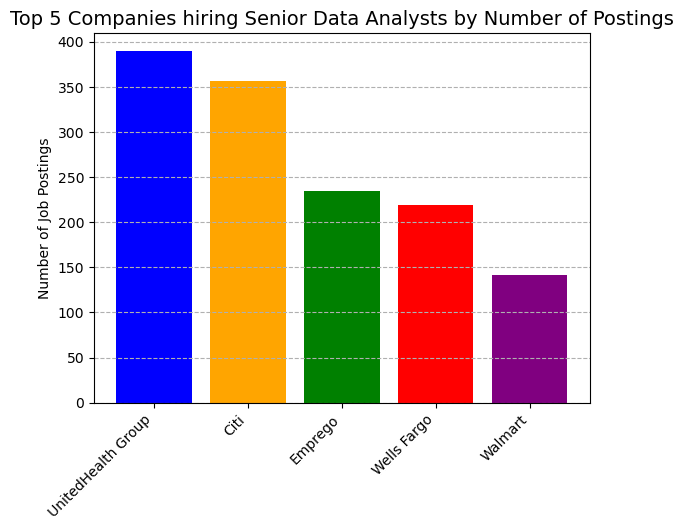

In [27]:
#alt
# Filter for Senior Data Analyst roles
SDA_df2 = df[df['job_title_short'] == 'Senior Data Analyst'].copy()

# Get the top 5 companies by number of postings
location_counts = SDA_df2['company_name'].value_counts().head(5)

# Custom colors
colors = ['blue', 'orange', 'green', 'red', 'purple']

# Plot the bar chart
plt.bar(location_counts.index, location_counts.values, color=colors)
plt.xlabel('')
plt.ylabel('Number of Job Postings')
plt.title('Top 5 Companies hiring Senior Data Analysts by Number of Postings', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.show()                                        